# Monte Carlo (MC) for 2D Harmonic Oscillator


$$V(x) = \frac{1}{2} k x^2$$

In [232]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = [6.5, 5]

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['axes.labelsize'] = 30
plt.rcParams["axes.linewidth"] = 2.5
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["lines.linewidth"] = 3

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 3
plt.rcParams['ytick.minor.width'] = 3
plt.rcParams['xtick.minor.visible'] =  True
plt.rcParams['ytick.minor.visible'] =  True


plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.markerscale'] = 1

plt.rcParams['savefig.dpi'] = 500
plt.rcParams['savefig.bbox'] = 'tight'

matplotlib.rc('font', weight='bold')

In [233]:
def V(x, k=1):
    return 0.5*k*x**2

In [234]:
NSteps = 10000
MAXL = 1
BETA = 10
coord = np.zeros(NSteps+1)
nrg = np.zeros(NSteps+1)

In [235]:
# x0 = 10
coord[0] = 10
nrg[0] = V(coord[0])
xold = coord[0]
nrgold = nrg[0]

In [236]:
# Metropolis Monte Carlo
for step in range(NSteps):
    # Attempt a trial move
    #dx = MAXL * 2*np.random.random() - 1
    dx = np.random.uniform(-MAXL, MAXL)
    xnew = xold + dx
    nrgnew = V(xnew)
    dE = nrgnew - nrgold
    prob = np.exp(-BETA*dE)
    # Select the trial with probability "prob"
    if np.random.random() < prob:
        xold = xnew
        nrgold = nrgnew
    #else:
        # STAY BACK !!!
    coord[step+1] = xold
    nrg[step+1] = nrgold

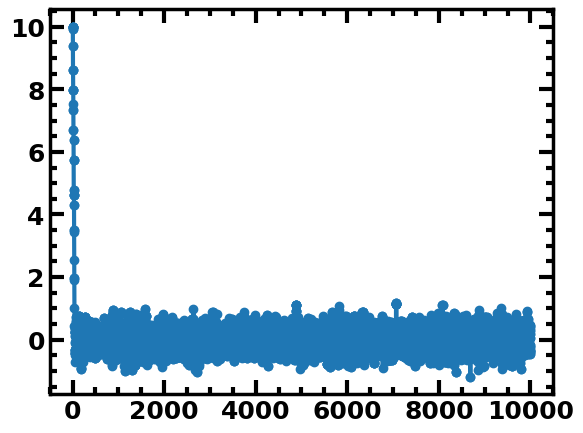

In [237]:
# Position with MC steps

plt.plot(coord,'-o')

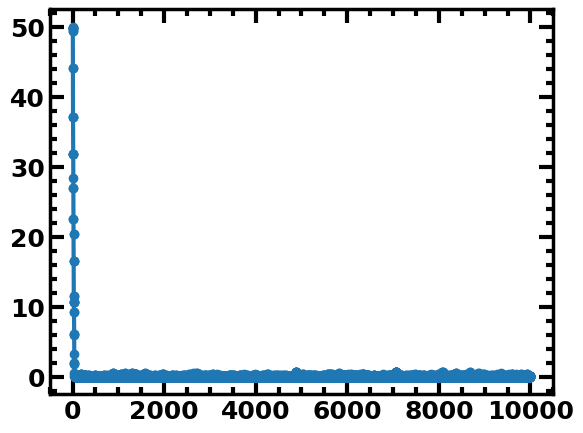

In [238]:
# Potential energy with MC steps

plt.plot(nrg, 'o-')

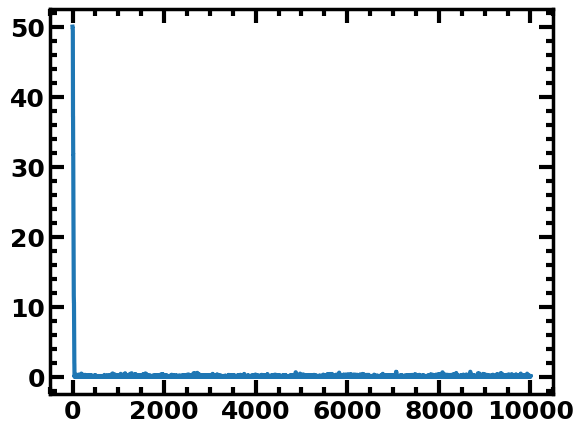

In [239]:
plt.plot(nrg)

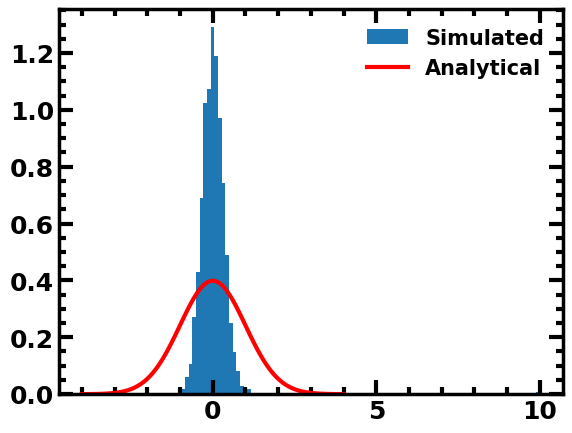

In [240]:
x = np.linspace(-4,4,100)
px = np.exp(-x**2 / 2)/np.sqrt(2*np.pi)
# Notice that I am using a smaller part of the trajectory to compute histogram
# to show that poor statistics can lead to bad match ... increase size to see convergence ...
# plt.hist(coord[100:1000], bins=100, density=True, label='Simulated')
plt.hist(coord, bins=100, density=True, label='Simulated')
plt.plot(x, px, 'r-', label="Analytical")
plt.legend()
plt.show()

In [241]:
hist, bin_edges = np.histogram(coord, bins='auto', density=True)

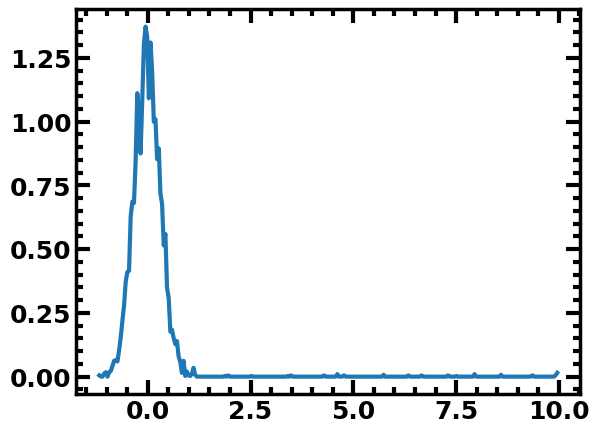

In [242]:
plt.plot(bin_edges[:-1], hist)

In [243]:
fes = -np.log(hist)

/var/folders/jc/r1qz74_n1_9613zrlx8dzt4r0000gn/T/ipykernel_40438/1970955571.py:1: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(hist)


In [244]:
fes

array([ 5.30385087e+00,             inf,             inf,  4.38756014e+00,
        4.05108790e+00,             inf,  4.05108790e+00,  3.79977347e+00,
        3.16378471e+00,  2.77812223e+00,  2.73890151e+00,  2.81894422e+00,
        2.25932843e+00,  1.86986367e+00,  1.51966124e+00,  1.27849918e+00,
        9.86362756e-01,  8.91052577e-01,  8.79004238e-01,  4.67568963e-01,
        3.76597185e-01,  3.83869944e-01,  1.68052433e-01, -1.05560544e-01,
       -3.36872097e-02,  1.33366875e-01, -7.83479805e-02, -2.66400212e-01,
       -3.16549996e-01, -2.87136110e-01, -8.75013625e-02, -2.70202498e-01,
       -1.76788053e-01,  5.45961964e-04, -9.35510902e-03,  1.59267603e-01,
        1.10894019e-01,  3.30571362e-01,  3.91195984e-01,  6.64279257e-01,
        5.80897648e-01,  1.05535563e+00,  1.17671648e+00,  1.73431817e+00,
        1.69293296e+00,  1.88612419e+00,  2.06517242e+00,  1.97164636e+00,
        2.53126215e+00,  2.86150383e+00,  4.20523858e+00,  2.77812223e+00,
        5.99699805e+00,  

In [245]:
fes = fes - np.min(fes)  # Shift the minimum to zero

In [246]:
fes

array([5.62040087,        inf,        inf, 4.70411013, 4.3676379 ,
              inf, 4.3676379 , 4.11632347, 3.4803347 , 3.09467222,
       3.05545151, 3.13549422, 2.57587843, 2.18641366, 1.83621123,
       1.59504917, 1.30291275, 1.20760257, 1.19555423, 0.78411896,
       0.69314718, 0.70041994, 0.48460243, 0.21098945, 0.28286279,
       0.44991687, 0.23820202, 0.05014978, 0.        , 0.02941389,
       0.22904863, 0.0463475 , 0.13976194, 0.31709596, 0.30719489,
       0.4758176 , 0.42744401, 0.64712136, 0.70774598, 0.98082925,
       0.89744764, 1.37190562, 1.49326648, 2.05086817, 2.00948295,
       2.20267418, 2.38172241, 2.28819636, 2.84781214, 3.17805383,
       4.52178858, 3.09467222, 6.31354805, 4.2341065 , 5.62040087,
       6.31354805, 4.92725369, 3.67449072, 5.21493576,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        inf,
              inf,        inf,        inf,        inf,        

In [247]:
# fes = fes[np.isfinite(fes)]

In [248]:
# fes

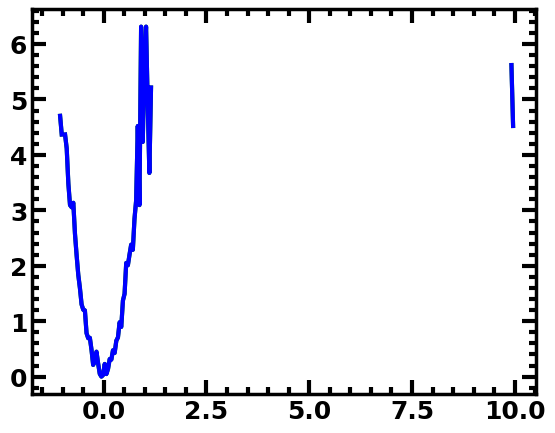

In [249]:
plt.plot(bin_edges[:-1], fes, color='green')

plt.plot(bin_edges[:-1], fes - fes.min(), color='blue')
plt.show()


/var/folders/jc/r1qz74_n1_9613zrlx8dzt4r0000gn/T/ipykernel_40438/4235252153.py:40: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(hist)


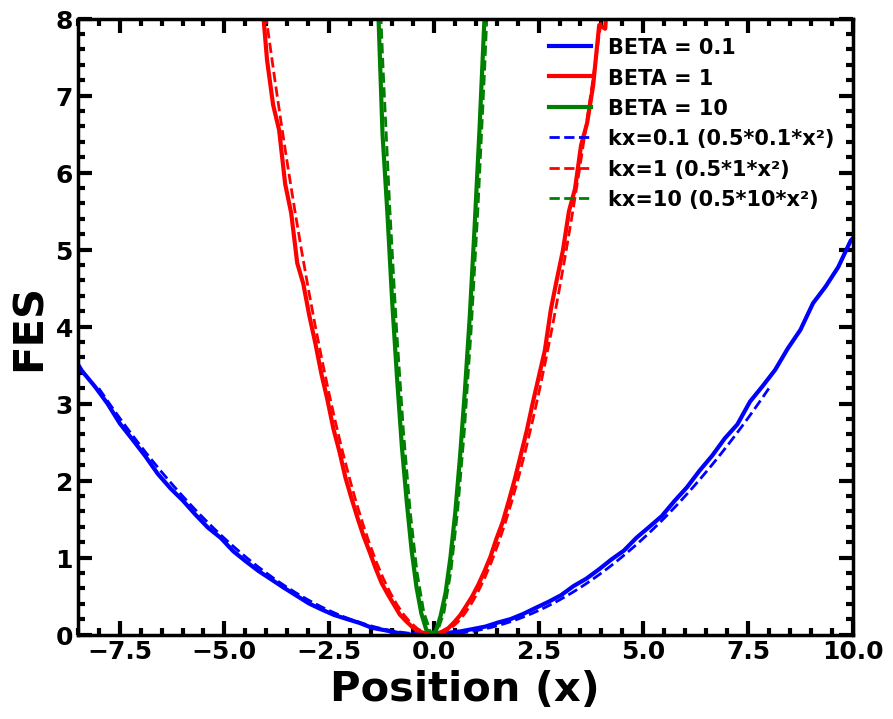

In [272]:
def V(x, k=1):
    return 0.5*k*x**2

NSteps = 1000000
MAXL = 1
beta_values = [0.1, 1, 10]  
colors = ['blue', 'red', 'green'] 
labels = [f'BETA = {beta}' for beta in beta_values]

# Create figure for FES plots
plt.figure(figsize=(10, 8))

for i, BETA in enumerate(beta_values):
    coord = np.zeros(NSteps+1)
    nrg = np.zeros(NSteps+1)
    
    # x0 = 10
    coord[0] = 10
    nrg[0] = V(coord[0])
    xold = coord[0]
    nrgold = nrg[0]
    
    # Metropolis Monte Carlo
    for step in range(NSteps):
        # Attempt a trial move
        dx = np.random.uniform(-MAXL, MAXL)
        xnew = xold + dx
        nrgnew = V(xnew)
        dE = nrgnew - nrgold
        prob = np.exp(-BETA*dE)
        # Select the trial with probability "prob"
        if np.random.random() < prob:
            xold = xnew
            nrgold = nrgnew
        coord[step+1] = xold
        nrg[step+1] = nrgold
    
    # Calculate histogram and FES
    hist, bin_edges = np.histogram(coord, bins=100, density=True)
    fes = -np.log(hist)
    fes = fes - np.min(fes)  # Shift the minimum to zero
    
    # Plot FES for this beta value
    plt.plot(bin_edges[:-1], fes, color=colors[i], label=labels[i], linewidth=3)

# x_analytical = np.linspace(-4, 4, 100)
# fes_analytical = 0.5 * x_analytical**2
# plt.plot(x_analytical, fes_analytical, 'k--', linewidth=3, label='Analytical (0.5x²)')
x_analytical = np.linspace(-8, 8, 100)
for i, BETA in enumerate(beta_values):
    fes_analytical = 0.5 * BETA * x_analytical**2
    plt.plot(x_analytical, fes_analytical, '--', color=colors[i], linewidth=2, 
             label=f'kx={BETA} (0.5*{BETA}*x²)')

plt.xlabel('Position (x)')
plt.ylabel('FES')
plt.xlim(-8.5,10)
plt.ylim(0, 8)
plt.legend()
plt.show()

# Monte Carlo (MC) for 2D Harmonic Oscillator

$$V(x,y) = \frac{1}{2} (k_x x^2 + k_y y^2) $$

In [251]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [6.5, 5]

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams['axes.labelsize'] = 30
plt.rcParams["axes.linewidth"] = 2.5
plt.rcParams["axes.labelweight"] = 'bold'
plt.rcParams["lines.linewidth"] = 3

plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.right'] = True

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 3
plt.rcParams['ytick.minor.width'] = 3
plt.rcParams['xtick.minor.visible'] =  True
plt.rcParams['ytick.minor.visible'] =  True


plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.markerscale'] = 1

plt.rcParams['savefig.dpi'] = 500
plt.rcParams['savefig.bbox'] = 'tight'

matplotlib.rc('font', weight='bold')

In [252]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [253]:
def V(pos, kx=1, ky=1):
    return 0.5*(kx*pos[0]**2 + ky*pos[1]**2)

In [254]:
MAXL = 1
BETA = 1
kx = 0.1
ky = 1

NSteps = 10000
coord = np.zeros((NSteps+1,2))
nrg = np.zeros(NSteps+1)

# (x0, y0) = (8, 8)
coord[0] = [8, 8]
nrg[0] = V(coord[0], kx, ky)
xold = coord[0]
nrgold = nrg[0]

In [255]:
for step in range(NSteps):
    # Attempt a trial move
    #dx = MAXL * 2*np.random.random() - 1
    dx = np.random.uniform(-MAXL, MAXL, 2)
    xnew = xold + dx
    nrgnew = V(xnew, kx, ky)
    dE = nrgnew - nrgold
    prob = np.exp(-BETA*dE)
    # Select the trial with probability "prob"
    if np.random.random() < prob:
        xold = xnew
        nrgold = nrgnew
    #else:
        # STAY !!!
    coord[step+1] = xold
    nrg[step+1] = nrgold

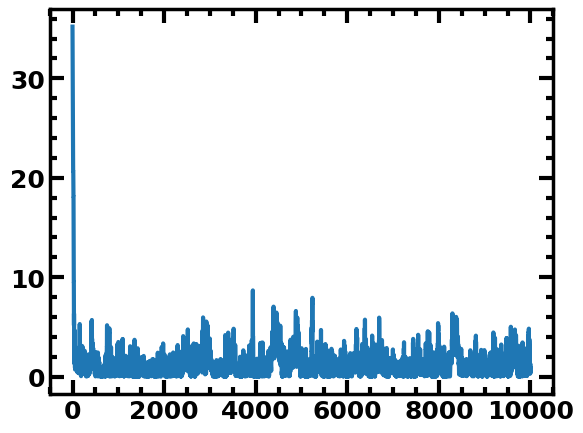

In [256]:
plt.plot(nrg)

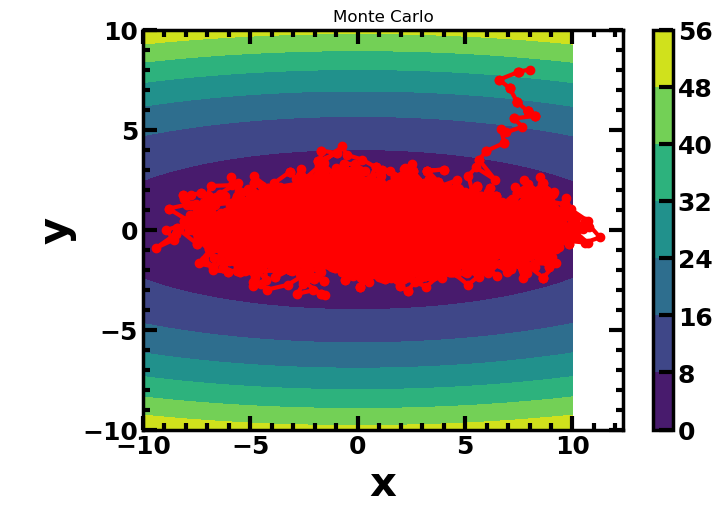

In [257]:
# Plotting starts here ...
fig = plt.figure(figsize=(6,4))
left, bottom, width, height = 0.0, 0.0, 1.0, 1.0
ax = fig.add_axes([left, bottom, width, height])

start, stop, n_values = -10, 10, 1000

x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = 0.5*(kx*X**2 + ky*Y**2)

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)

ax.set_title('Monte Carlo')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.plot(coord[:,0],coord[:,1],"ro-")
plt.show()

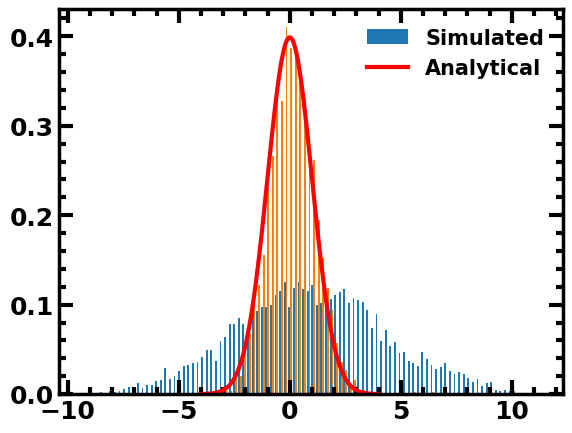

In [258]:
x = np.linspace(-4,4,100)
px = np.exp(-x**2 / 2)/np.sqrt(2*np.pi)
# Notice that I am using a smaller part of the trajectory to compute histogram
# to show that poor statistics can lead to bad match ... increase size to see convergence ...
# plt.hist(coord[100:1000], bins=100, density=True, label='Simulated')
plt.hist(coord, bins=100, density=True, label='Simulated')
plt.plot(x, px, 'r-', label="Analytical")
plt.legend()
plt.show()

In [259]:
hist, bin_edges = np.histogram(coord, bins='auto', density=True)

In [260]:
# fes = -np.log(np.histogram(coord, bins=100, density=True)[0])
# fes =-np.log(px)
# fes2=-np.log(px)

In [261]:
bin_edges.shape

(119,)

In [262]:
hist.shape


(118,)

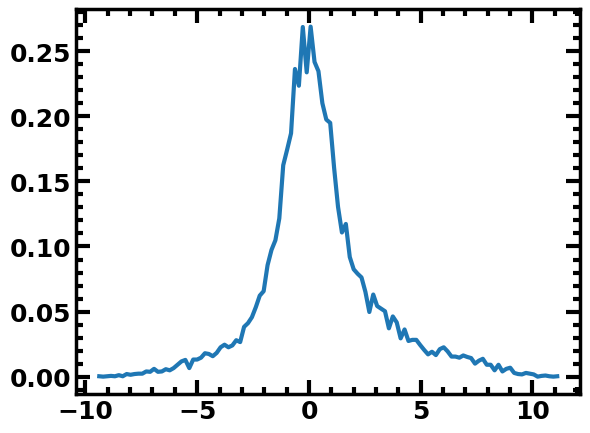

In [263]:
plt.plot(bin_edges[:-1], hist)

In [264]:
fes = -np.log(hist)

/var/folders/jc/r1qz74_n1_9613zrlx8dzt4r0000gn/T/ipykernel_40438/1970955571.py:1: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(hist)


In [265]:
fes

array([8.16135833,        inf, 8.16135833, 7.46821115, 8.16135833,
       6.77506397, 8.16135833, 6.21544818, 6.55192042, 6.21544818,
       6.08191679, 6.08191679, 5.522301  , 5.59640897, 5.11683589,
       5.59640897, 5.522301  , 5.16562606, 5.32814499, 5.02586412,
       4.69562243, 4.44778627, 4.35469584, 5.02586412, 4.33271694,
       4.33271694, 4.2295327 , 4.01822361, 4.05048447, 4.15402515,
       4.00247525, 3.79191048, 3.70701104, 3.79191048, 3.73054153,
       3.57639085, 3.62875884, 3.26351853, 3.19154503, 3.08618452,
       2.93024972, 2.77686327, 2.72327902, 2.45757586, 2.32947585,
       2.25599648, 2.10691899, 1.8174779 , 1.74626137, 1.6767231 ,
       1.44234518, 1.49822564, 1.31441519, 1.45327425, 1.31335306,
       1.41965764, 1.44961794, 1.56012821, 1.62177238, 1.63486347,
       1.82985648, 2.03667494, 2.20035299, 2.14276512, 2.38680679,
       2.49493164, 2.53734083, 2.57410967, 2.7320127 , 3.00230303,
       2.76319563, 2.91433426, 2.95187218, 2.99087434, 3.29382

In [266]:
fes2= pd.DataFrame(fes)
fes2.to_csv('fes2.csv')

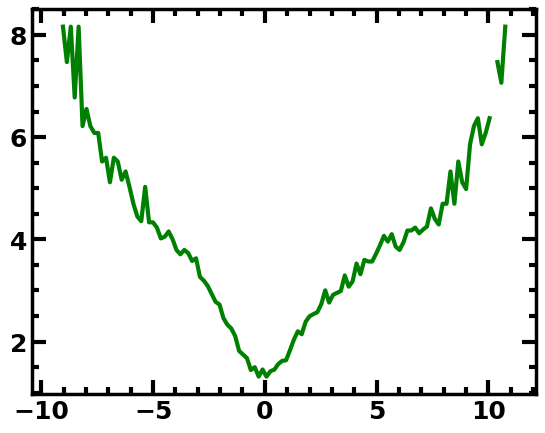

In [267]:
# plt.plot(bin_edges[:-1], fes, color='blue')
# plt.plot(bin_edges[:-1], fes1, color='orange')
plt.plot(bin_edges[:-1], fes, color='green')
plt.show()

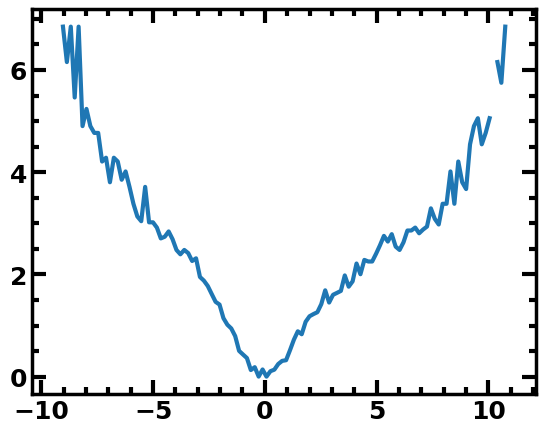

In [268]:
plt.plot(bin_edges[:-1], fes - fes.min())
# plt.plot(bin_edges[:-1], V(bin_edges[:-1], kx, ky) - V(0, kx, ky), color='red')

/var/folders/jc/r1qz74_n1_9613zrlx8dzt4r0000gn/T/ipykernel_40438/3923406447.py:45: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(hist)


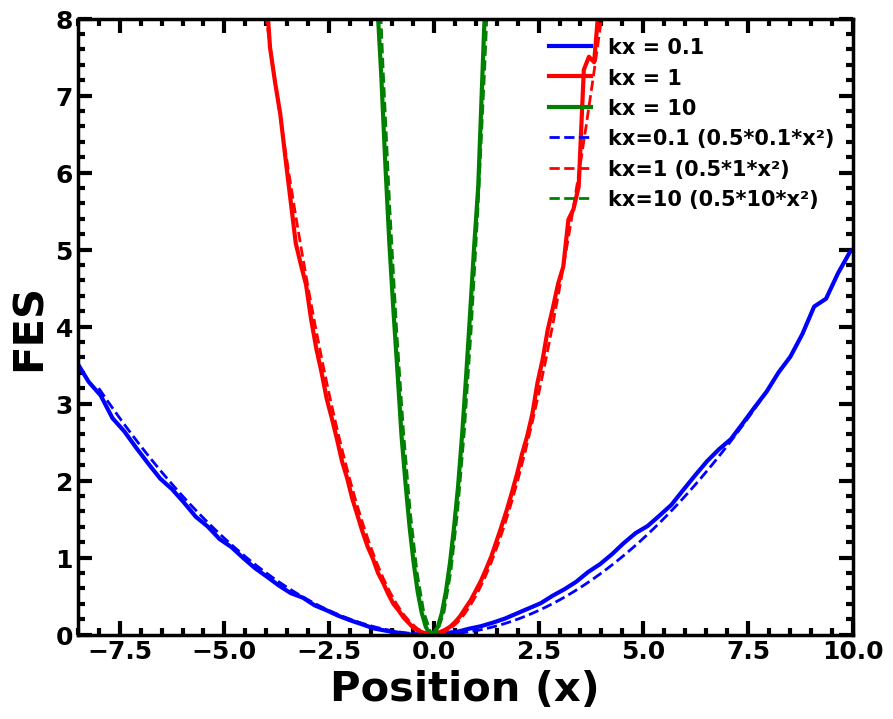

In [269]:
import numpy as np
import matplotlib.pyplot as plt

def V(pos, kx=1, ky=1):
    return 0.5*(kx*pos[0]**2 + ky*pos[1]**2)

NSteps = 1000000
MAXL = 1
kx_values = [0.1, 1, 10]  
ky = 1
BETA = 1
colors = ['blue', 'red', 'green'] 
labels = [f'kx = {kx}' for kx in kx_values]

# Create figure for FES plots
plt.figure(figsize=(10, 8))

for i, kx in enumerate(kx_values):
    coord = np.zeros((NSteps+1, 2))
    nrg = np.zeros(NSteps+1)
    
    # (x0, y0) = (8, 8)
    coord[0] = [8, 8]
    nrg[0] = V(coord[0], kx, ky)
    xold = coord[0]
    nrgold = nrg[0]
    
    # Metropolis Monte Carlo
    for step in range(NSteps):
        # Attempt a trial move
        dx = np.random.uniform(-MAXL, MAXL, 2)
        xnew = xold + dx
        nrgnew = V(xnew, kx, ky)
        dE = nrgnew - nrgold
        prob = np.exp(-BETA*dE)
        # Select the trial with probability "prob"
        if np.random.random() < prob:
            xold = xnew
            nrgold = nrgnew
        coord[step+1] = xold
        nrg[step+1] = nrgold
    
    # Calculate histogram and FES for x-coordinate only
    hist, bin_edges = np.histogram(coord[:, 0], bins=100, density=True)
    fes = -np.log(hist)
    fes = fes - np.min(fes)  # Shift the minimum to zero
    
    # Plot FES for this kx value
    plt.plot(bin_edges[:-1], fes, color=colors[i], label=labels[i], linewidth=3)

# Analytical solution for x-coordinate only
x_analytical = np.linspace(-8, 8, 100)
for i, kx in enumerate(kx_values):
    fes_analytical = 0.5 * kx * x_analytical**2
    plt.plot(x_analytical, fes_analytical, '--', color=colors[i], linewidth=2, 
             label=f'kx={kx} (0.5*{kx}*x²)')

plt.xlabel('Position (x)')
plt.ylabel('FES')
plt.xlim(-8.5, 10)
plt.ylim(0, 8)
plt.legend()
plt.show()

# Monte Carlo (MC) for 2D Harmonic Oscillator


$$V(x) = \ k (x^2 - 1)^2$$

In [303]:
def V(x, k=1):
    return k*(x**2-1)**2

In [318]:
NSteps = 100000
MAXL = 1
BETA = 10
coord = np.zeros(NSteps+1)
nrg = np.zeros(NSteps+1)

In [319]:
# x0 = 10
coord[0] = 10
nrg[0] = V(coord[0])
xold = coord[0]
nrgold = nrg[0]

In [320]:
# Metropolis Monte Carlo
for step in range(NSteps):
    # Attempt a trial move
    #dx = MAXL * 2*np.random.random() - 1
    dx = np.random.uniform(-MAXL, MAXL)
    xnew = xold + dx
    nrgnew = V(xnew)
    dE = nrgnew - nrgold
    prob = np.exp(-BETA*dE)
    # Select the trial with probability "prob"
    if np.random.random() < prob:
        xold = xnew
        nrgold = nrgnew
    #else:
        # STAY BACK !!!
    coord[step+1] = xold
    nrg[step+1] = nrgold

/var/folders/jc/r1qz74_n1_9613zrlx8dzt4r0000gn/T/ipykernel_40438/828925814.py:9: RuntimeWarning: overflow encountered in exp
  prob = np.exp(-BETA*dE)


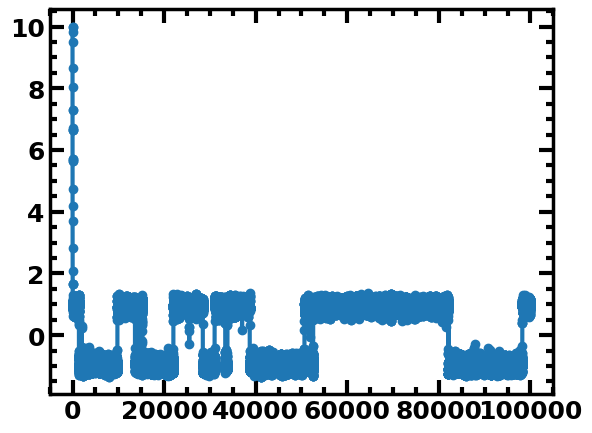

In [321]:
# Position with MC steps

plt.plot(coord,'-o')

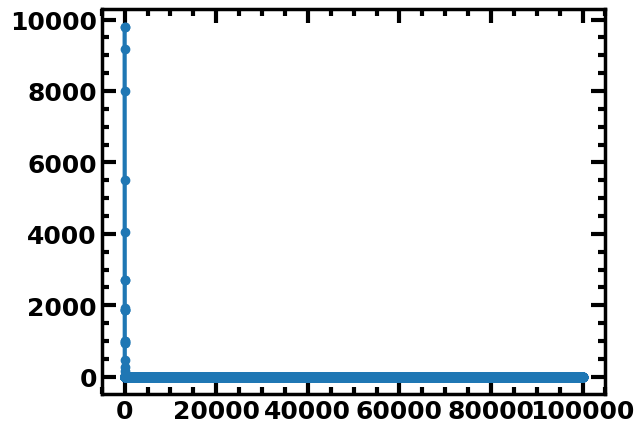

In [322]:
# Position with MC steps

plt.plot(nrg,'-o')

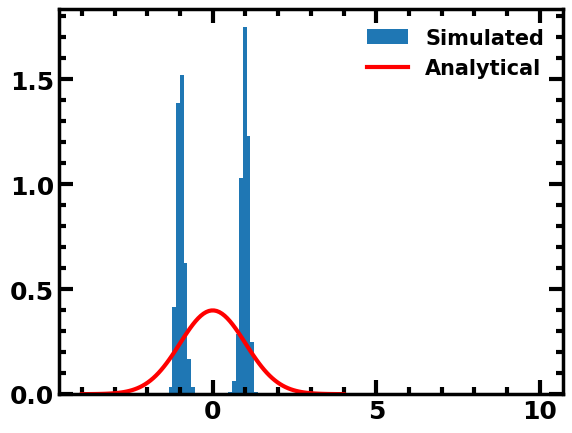

In [323]:
x = np.linspace(-4,4,100)
px = np.exp(-x**2 / 2)/np.sqrt(2*np.pi)
# Notice that I am using a smaller part of the trajectory to compute histogram
# to show that poor statistics can lead to bad match ... increase size to see convergence ...
# plt.hist(coord[100:1000], bins=100, density=True, label='Simulated')
plt.hist(coord, bins=100, density=True, label='Simulated')
plt.plot(x, px, 'r-', label="Analytical")
plt.legend()
plt.show()

In [324]:
hist, bin_edges = np.histogram(coord, bins='auto', density=True)

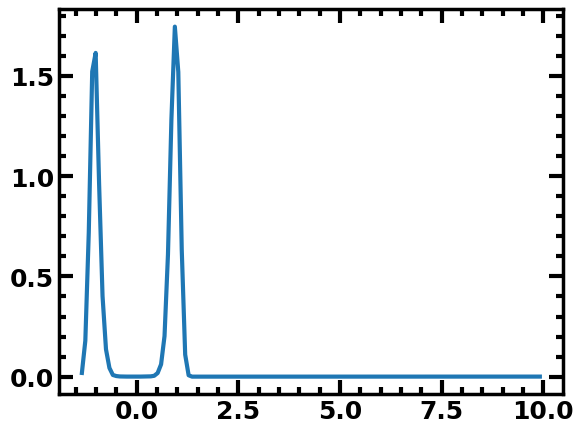

In [325]:
plt.plot(bin_edges[:-1], hist)

In [326]:
fes = -np.log(hist)


/var/folders/jc/r1qz74_n1_9613zrlx8dzt4r0000gn/T/ipykernel_40438/2778021519.py:1: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(hist)


In [327]:
fes = fes - np.min(fes)  # Shift the minimum to zero

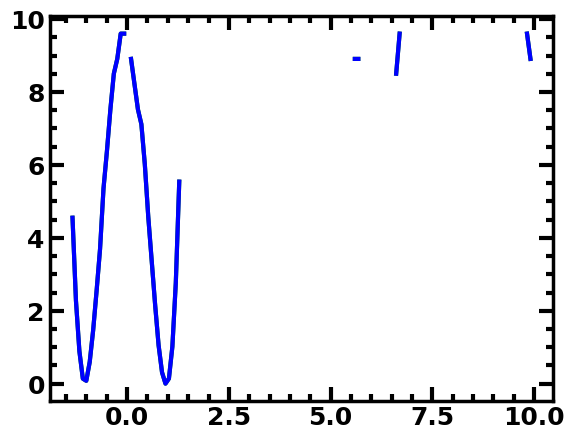

In [328]:
plt.plot(bin_edges[:-1], fes, color='green')

plt.plot(bin_edges[:-1], fes - fes.min(), color='blue')
plt.show()


/var/folders/jc/r1qz74_n1_9613zrlx8dzt4r0000gn/T/ipykernel_40438/515887027.py:30: RuntimeWarning: overflow encountered in exp
  prob = np.exp(-BETA*dE)
/var/folders/jc/r1qz74_n1_9613zrlx8dzt4r0000gn/T/ipykernel_40438/515887027.py:40: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(hist)


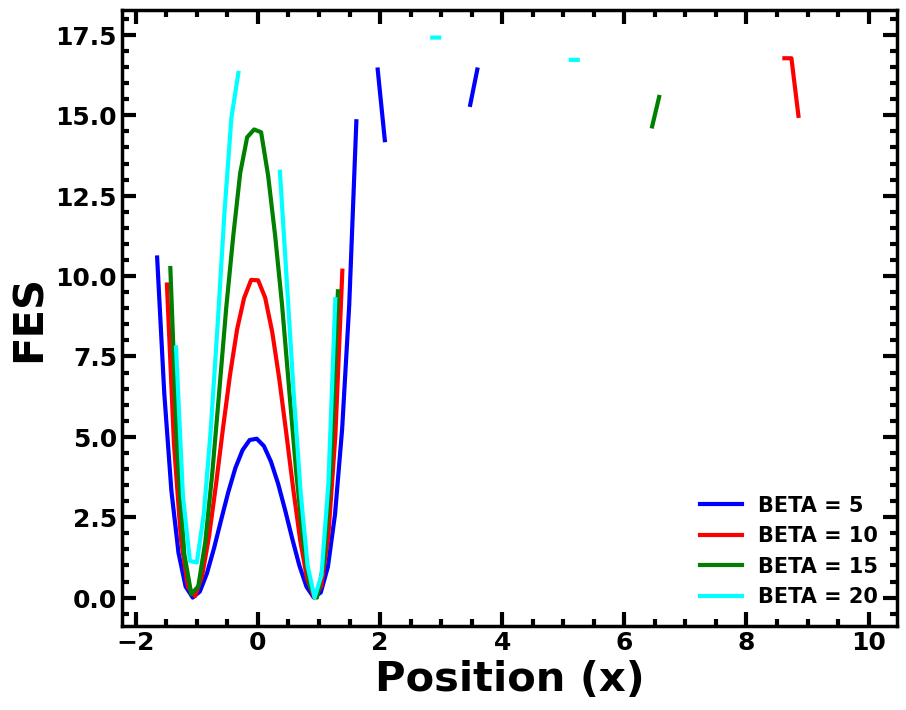

In [336]:
def V(x, k=1):
    return k*(x**2-1)**2

NSteps = 100000000
MAXL = 1
beta_values = [5, 10, 15, 20]  
colors = ['blue', 'red', 'green','cyan'] 
labels = [f'BETA = {beta}' for beta in beta_values]

# Create figure for FES plots
plt.figure(figsize=(10, 8))

for i, BETA in enumerate(beta_values):
    coord = np.zeros(NSteps+1)
    nrg = np.zeros(NSteps+1)
    
    # x0 = 10
    coord[0] = 10
    nrg[0] = V(coord[0])
    xold = coord[0]
    nrgold = nrg[0]
    
    # Metropolis Monte Carlo
    for step in range(NSteps):
        # Attempt a trial move
        dx = np.random.uniform(-MAXL, MAXL)
        xnew = xold + dx
        nrgnew = V(xnew)
        dE = nrgnew - nrgold
        prob = np.exp(-BETA*dE)
        # Select the trial with probability "prob"
        if np.random.random() < prob:
            xold = xnew
            nrgold = nrgnew
        coord[step+1] = xold
        nrg[step+1] = nrgold
    
    # Calculate histogram and FES
    hist, bin_edges = np.histogram(coord, bins=100, density=True)
    fes = -np.log(hist)
    fes = fes - np.min(fes)  # Shift the minimum to zero
    
    # Plot FES for this beta value
    plt.plot(bin_edges[:-1], fes, color=colors[i], label=labels[i], linewidth=3)


# x_analytical = np.linspace(-8, 8, 100)
# for i, BETA in enumerate(beta_values):
#     fes_analytical = 0.5 * BETA * (x_analytical**2 - 1)**2
#     plt.plot(x_analytical, fes_analytical, '--', color=colors[i], linewidth=2, 
#              label=f'kx={BETA} ({BETA}*(x²-1)²)')

plt.xlabel('Position (x)')
plt.ylabel('FES')
# plt.xlim(-8.5,10)
# plt.ylim(0, 8)
plt.legend()
plt.show()